In [1]:
# -*- coding: UTF-8 -*-

# Render our plots inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import shutil

pd.set_option('display.max_columns', None) # Display all the columns

sns.set()
#sns.set_style("whitegrid") # Seaborn style

In [3]:
data = pd.read_csv("csv/outcomes.csv")

In [4]:
# Set index by repository
data1 = data.set_index("Repository")

In [5]:
# Transform the date from string to datetime
data1["Date"] = pd.to_datetime(data1["Date"])

In [6]:
# Create a time series dataframe
profile = data1.pivot_table(index='Date',columns='Repository',values='Commits')

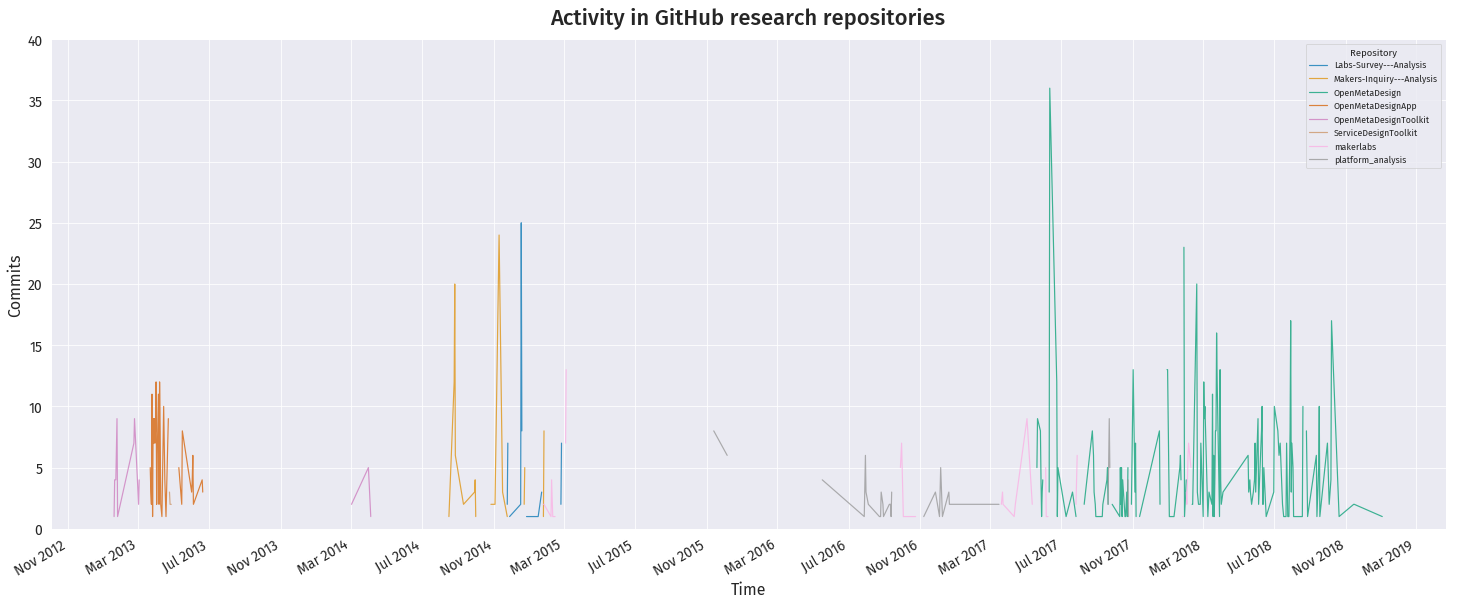

In [7]:
# Configure font
matplotlib.rcParams['font.sans-serif'] = "Fira Sans"
matplotlib.rcParams['font.family'] = "sans-serif"
sns.set_context("paper")

# Plot the data
my_colors = sns.color_palette("colorblind", len(profile.columns)) # Set color palette
ax = profile.plot(color=my_colors, alpha=0.75, rot=0, figsize=(25,10))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Commits', fontsize=16)
plt.title("Activity in GitHub research repositories", fontsize=22, y=1.02, fontname='Fira Sans', fontweight="500")

# Time ticks
# 4 Months ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

# Fix y axis limits
plt.ylim(0, 40)

plt.savefig("svg/outcomes.svg", bbox_inches="tight")
plt.savefig("png/outcomes.png", dpi=300, bbox_inches="tight")